# Data Analysis and Prediction using Linear Regression Module

## 1. Import Library

In [30]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Add Dataset and Segregate Dataset for each Variant

In [31]:
# Read CSV for all dataset
datacovid = pd.read_csv('datasetcovidsamplejkt.csv')
datacovid.columns

Index(['Tanggal', 'Variant_Suspect', 'Day', 'ID_DAILY_POSITIVE',
       'ID_DAILY_HOSPITALIZED', 'ID_DAILY_CURED', 'ID_DAILY_DEATH',
       'JKT_DAILY_DEATH', 'JKT_DAILY_CURED', 'JKT_DAILY_ISOLATION',
       'JKT_DAILY_HOSPITALIZED', 'JKT_DAILY_POSITIVE',
       'JKT_DAILY_TESTSPECIMENT', 'JKT_DAILY_POSTEST', 'JKT_DAILY_POSTRATE',
       'JKT_CONS_VALUE', 'CoF_HSE', 'PoF_Spec_X_PostRate', 'Risk',
       'Risk_Criteria'],
      dtype='object')

In [32]:
# Select important dataset only for analysis and prediction

covid_JKT = datacovid.loc[:,['Variant_Suspect','Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk']]

covid_Delta = datacovid.loc[datacovid.Variant_Suspect=='Delta',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk','Risk_Criteria']]
covid_Omicron = datacovid.loc[datacovid.Variant_Suspect=='Omicron',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','Risk','Risk_Criteria']]

## 3. Linear Regression Analysis

### 3.1 Single Variable Prediction between Daily Positive and Positivity Rate

In [33]:
# Import Library for Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Declaration test train split for supervise learning
# from pairplot above, we can see that correlation between postivity rate may have linear correlation with positive number.
X_train, X_test, y_train, y_test = train_test_split(covid_Delta.JKT_DAILY_POSTRATE, covid_Delta.JKT_DAILY_POSITIVE)

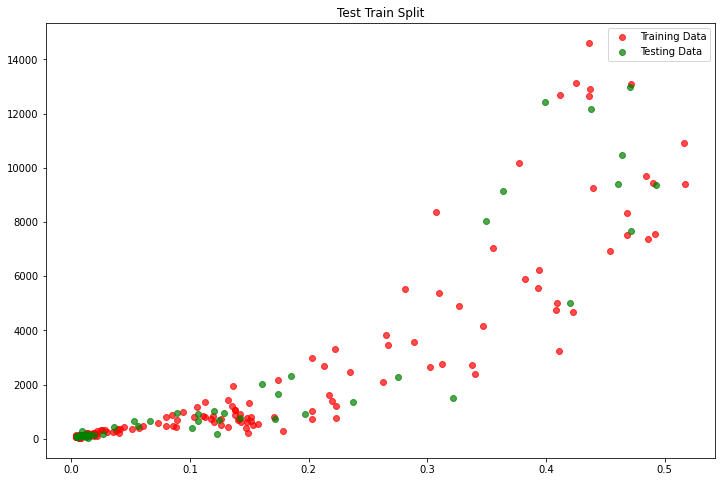

In [34]:
# Test train split visualization
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, label='Training Data', color='r',alpha=0.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g',alpha=0.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [35]:
# Model fitting using Linear Regression Module
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

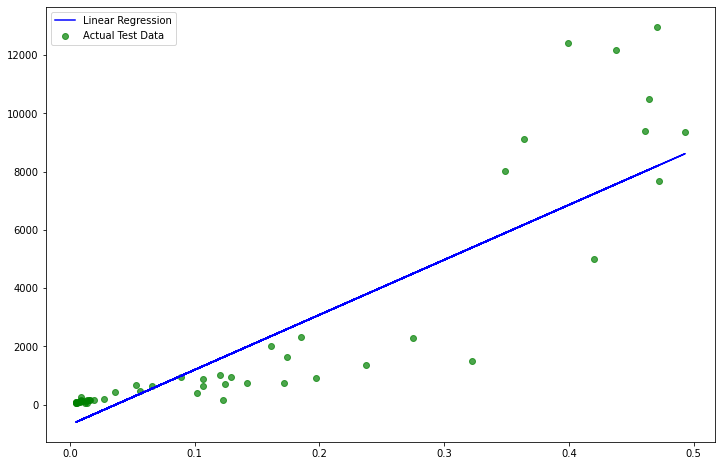

In [36]:
# Use model to predict on test data
prediction = LR.predict(X_test.values.reshape(-1,1))

# Plot prediction line against actual test data
plt.figure(figsize=(12,8))
plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()

In [37]:
#find parameter for Linear Regression

lrcoef = LR.coef_

lrint = LR.intercept_

print("LR Coefficient: ",lrcoef)
print("LR Intercept: ", lrint)

LR Coefficient:  [18870.0939501]
LR Intercept:  -691.5766253011052


In [38]:
#daily_positive_predict = LR.intercept_ + LR.coef_*(daily_postrate)

daily_postrate = 0.4

daily_positive_predict = lrint + lrcoef*daily_postrate

daily_positive_predict

array([6856.46095474])

In [39]:
# direct predict estimated daily_positive_predict using predict

LR.predict(np.array([[0.4]]))[0]

6856.460954739539

In [40]:
# Model scoring

print('Mean squared error (MSE): %.2f'
    % mean_squared_error(y_test, prediction))
print('Coefficient of determination (R^2): %.2f'
    % r2_score(y_test, prediction))

Mean squared error (MSE): 2924602.78
Coefficient of determination (R^2): 0.79


### 4.2 Polynomial Features Single Variable between Daily Positive and Positivity Rate

reference: https://data36.com/polynomial-regression-python-scikit-learn/

In [41]:
#Start Polynomial Features

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

In [42]:
ds_delta = covid_Delta.loc[:, ['Day', 'JKT_DAILY_POSTRATE', 'JKT_DAILY_POSITIVE', 'Risk']].sort_values(by=['JKT_DAILY_POSTRATE'])
ds_delta.head()

,Day,JKT_DAILY_POSTRATE,JKT_DAILY_POSITIVE,Risk
635,208,0.004,70,1
622,195,0.004,54,1
623,196,0.004,92,1
602,175,0.004,131,2
629,202,0.004,114,2


In [43]:
Xpostrate = ds_delta.JKT_DAILY_POSTRATE
ypost = ds_delta.JKT_DAILY_POSITIVE

In [44]:
# Creating new features

poly_features = poly.fit_transform(Xpostrate.values.reshape(-1,1))

In [45]:
# Creating the polynomial regression model

PR = LinearRegression()


In [46]:
# Fit model
PRFIT = PR.fit(poly_features, ypost)

In [47]:
y_predicted = PR.predict(poly_features)

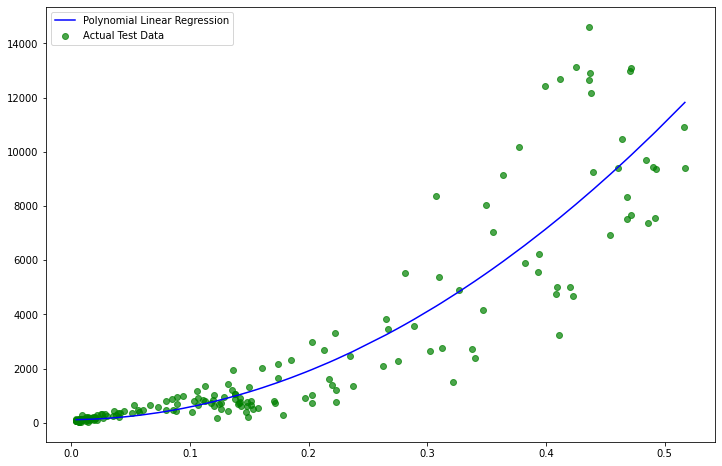

In [48]:
plt.figure(figsize=(12,8))
plt.plot(Xpostrate, y_predicted, label='Polynomial Linear Regression', color='b')
plt.scatter(Xpostrate, ypost, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()

In [49]:
print('Mean squared error (MSE): %.2f'
    % mean_squared_error(ypost, y_predicted))
print('Coefficient of determination (R^2): %.2f'
    % r2_score(ypost, y_predicted))

Mean squared error (MSE): 1936153.01
Coefficient of determination (R^2): 0.84


The polynomial regression has _higher Rsquare value_ hence it is expected more accurate.

In [50]:
PRcoef = PR.coef_

PRint = PR.intercept_

print("PR Coefficient: ",PRcoef)
print("PR Intercept: ", PRint)

PR Coefficient:  [  409.47493252 43025.77032065]
PR Intercept:  111.55675239492939


In [51]:
#daily_positive_predict = PR.intercept_ + PR.coef_(1)*(daily_postrate) + PR.coef_(2)*(daily_postrate)^2

daily_postrate = 0.4

daily_positive_predict = PRint + 409.47493252*daily_postrate + 43025.77032065*daily_postrate**2

daily_positive_predict

7159.4699767069305

In [52]:
# Prediction using Predict

PR.predict(poly.fit_transform([[0.4]]))

array([7159.46997671])

### 4.3 Prediction using Multiple Variable in Linear Regression

Selected variable are 